# Import Section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from keras import Sequential
from keras.layers import Dense, Dropout, LSTM


# Loading Dataset

In [216]:
FILE_PATH_TRAINING = "../dataset/UNSW_NB15_training-set.csv"
FILE_PATH_TESTING = "../dataset/UNSW_NB15_testing-set.csv"

df_training =   pd.read_csv(FILE_PATH_TRAINING)
df_testing =    pd.read_csv(FILE_PATH_TESTING)

# EDA

In [3]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [4]:
df_training.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [5]:
df_training['service']

0        -
1        -
2        -
3        -
4        -
        ..
82327    -
82328    -
82329    -
82330    -
82331    -
Name: service, Length: 82332, dtype: object

In [105]:
df_training.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,1,1,2,0,0,0,1,2,0,Normal
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,1,1,2,0,0,0,1,2,0,Normal
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,1,1,3,0,0,0,1,3,0,Normal
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,2,1,3,0,0,0,2,3,0,Normal
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,2,1,3,0,0,0,2,3,0,Normal


# Data Preprocessing

## Removing columns

In [42]:
columns_to_remove = ['id','proto','state','service','attack_cat']
df_training.drop(columns_to_remove, axis=1, inplace=True)
df_testing.drop(columns_to_remove, axis=1,inplace=True)


### Remove columns for multi-class classification

In [217]:
columns_to_remove = ['id','proto','state','service','label']
df_training.drop(columns_to_remove, axis=1, inplace=True)
df_testing.drop(columns_to_remove, axis=1,inplace=True)

## Data Standardization

In [218]:
standard_scaler = StandardScaler()

for column in df_training.columns:
    if column != 'label' and column != 'attack_cat':
        standard_scaler.fit(df_training[column].values.reshape(-1,1))
        df_training[column] = standard_scaler.transform(df_training[column].values.reshape(-1,1))
        df_testing[column] = standard_scaler.transform(df_testing[column].values.reshape(-1,1))

# Train Test Split

## Splitting

In [107]:
X_train = df_training.drop('label', axis=1)
y_train = df_training['label']

X_test = df_testing.drop('label', axis=1)
y_test = df_testing['label']



KeyError: "['label'] not found in axis"

### Spliting for multiclass classification

In [219]:
X_train = df_training.drop('attack_cat', axis=1)
y_train = df_training['attack_cat']

X_test = df_testing.drop('attack_cat', axis=1)
y_test = df_testing['attack_cat']

### Encoding for multiclass classification

In [220]:
# encode attack_cat using label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.transform(y_test)


# y_train = pd.get_dummies(y_train)
# y_test = pd.get_dummies(y_test)


In [226]:
f={}
for i in range(len(y_train)):
    if y_train[i] not in f:
        f[y_train[i]]=1
    else:
        f[y_train[i]]+=1
print(f)

{6: 37000, 7: 37000, 1: 37000, 2: 37000, 3: 37000, 0: 37000, 4: 37000, 9: 37000, 8: 37000, 5: 37000}


In [227]:
# Calculate class weights to handle class imbalance
class_counts = np.bincount(y_train)
class_weights = dict(enumerate((max(class_counts) / class_counts).astype(float)))
print(class_weights)


{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


### Random Oversampling for multiclass classification

In [223]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)


In [224]:
X_train, y_train = X_train_oversampled, y_train_oversampled

In [225]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((370000, 39), (370000,), (175341, 39), (175341,))

## Validation split

In [124]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [208]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((370000, 39), (370000,), (16467, 10), (16467,))

In [209]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)



KeyboardInterrupt: 

In [210]:

# Get feature importances
feature_importances = rf.feature_importances_

In [211]:
feature_importances

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [212]:
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances}).sort_values('importance', ascending = False)


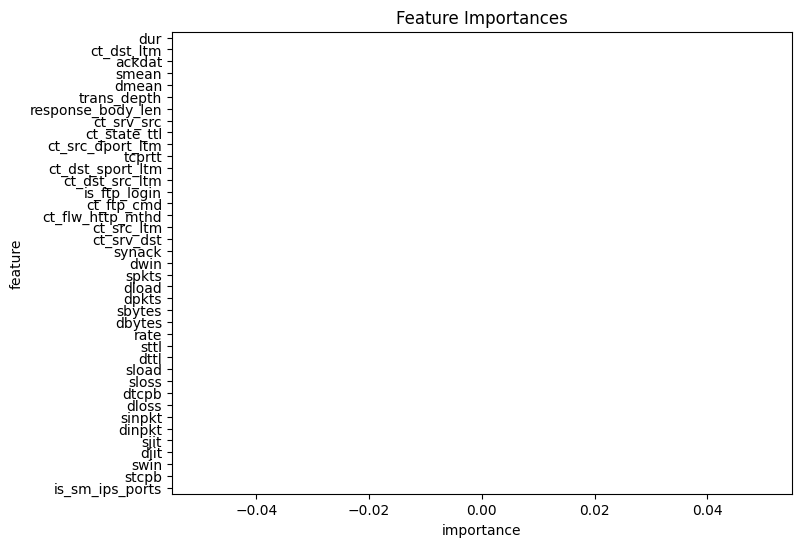

In [213]:
# plot feature importances
plt.figure(figsize = (8, 6))
sns.barplot(x = 'importance', y = 'feature', data = feature_importances)
plt.title('Feature Importances')
plt.show()


In [181]:
# select features with importance greater than 0.01
selected_features = feature_importances[feature_importances['importance'] > 0.01]['feature'].values


In [214]:
# total number of features selected vs total number of features
len(selected_features), X_train.shape[1]

(10, 39)

In [183]:
# new training and testing data with selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_val = X_val[selected_features]

In [230]:
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((370000, 39), (175341, 39), (16467, 10), (370000,), (175341,), (16467,))

## Feature Selection

# Model ANN

## Model

In [228]:
def get_model_ann():
  model = Sequential()
  model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(1), activation='sigmoid')
  
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def get_model_ann_multiclass():
  model = Sequential()
  model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# model_ann = get_model_ann()  
model_ann = get_model_ann_multiclass()

## Train

In [229]:
history_ann = model_ann.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_data=(X_val, y_val), class_weight=class_weights)

Epoch 1/50
5770/5782 [============================>.] - ETA: 0s - loss: 1.0266 - accuracy: 0.6267

ValueError: in user code:

    File "d:\ProgramData\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "d:\ProgramData\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\ProgramData\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "d:\ProgramData\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "d:\ProgramData\Anaconda3\envs\ai\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\ProgramData\Anaconda3\envs\ai\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 39), found shape=(None, 10)


## Predict

In [186]:
y_prediction_ann = model_ann.predict(X_test)


5480/5480 [==============================] - 11s 2ms/step


In [71]:
threshold = 0.5
y_prediction_ann = np.where(y_prediction_ann > threshold, 1, 0)

In [72]:
accuracyScore_ann = accuracy_score(y_test, y_prediction_ann)
print("ANN Accuracy: ", accuracyScore_ann)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [187]:
y_prediction_ann_multiclass = np.argmax(y_prediction_ann, axis=1)

In [188]:
# calculate accuracy
accuracyScore_ann = accuracy_score(y_test, y_prediction_ann_multiclass)
print("ANN Accuracy with multiclass: ", accuracyScore_ann)

ANN Accuracy with multiclass:  0.6690677023628244


### Plot graph of probability of each class

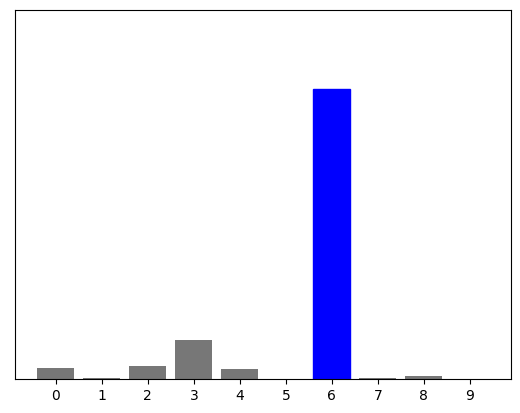

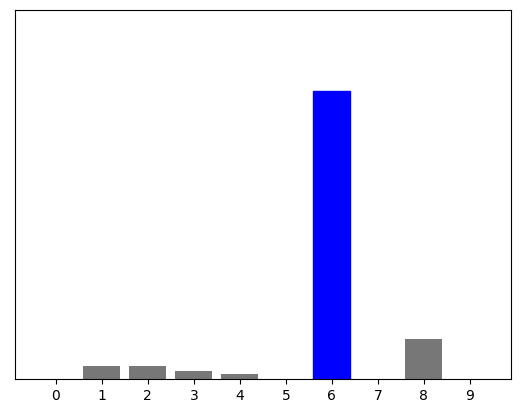

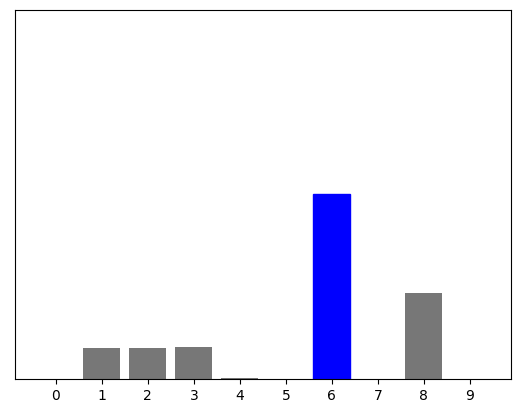

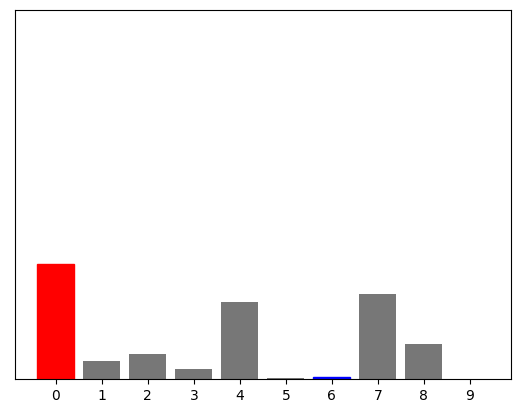

In [189]:
def plot_probabilities(y_prediction_array, true_label,predicted_label=None):
  if predicted_label is None:
    predicted_label = np.argmax(y_prediction_array)
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), y_prediction_array, color="#777777")
  plt.ylim([0, 1])
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  plt.show()


for i in range(56, 60):
  plot_probabilities(y_prediction_ann[i], y_test[i], y_prediction_ann_multiclass[i])

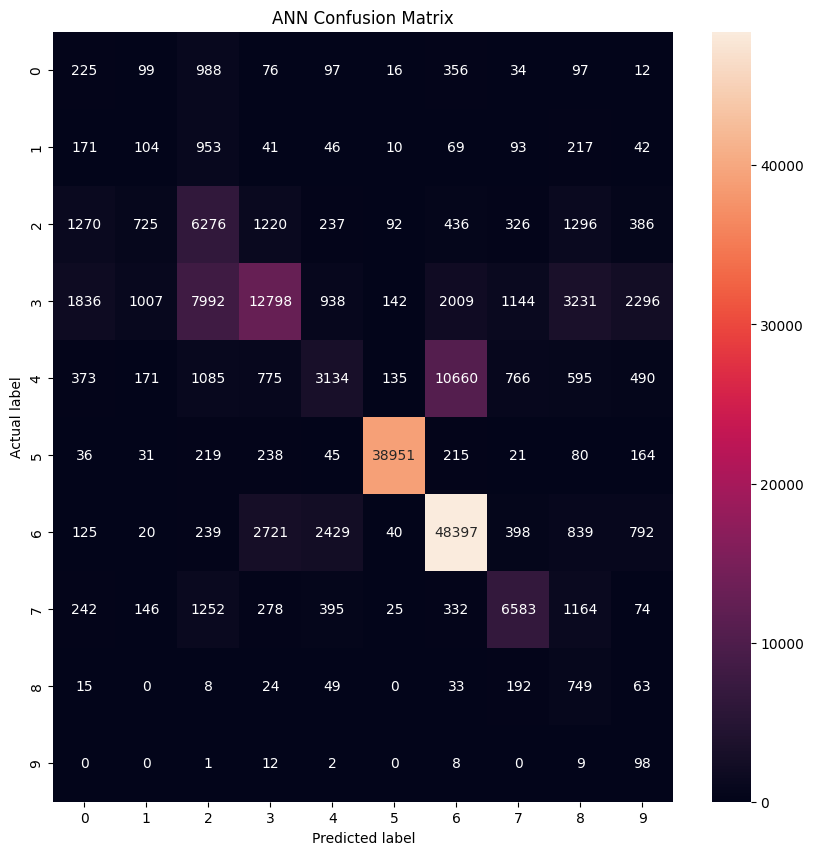

In [190]:
def plot_confusion_matrix(y_test, y_prediction, title):
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
plot_confusion_matrix(y_test, y_prediction_ann_multiclass, "ANN Confusion Matrix")

### Predict for multi-class classification

In [145]:
# save model with time and accuracy
import datetime
model_ann.save('model_ann_'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'_'+str(accuracyScore_ann)[0:5]+'.h5')

## Confusion Matrix

In [ ]:
print(classification_report(y_test, y_prediction_ann))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     56000
           1       0.99      0.85      0.91    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341



In [175]:
## give confusion matrix
cm_ann = confusion_matrix(y_test, y_prediction_ann)
##  plot it
plt.figure(figsize=(10,10))
plt.title('ANN Confusion Matrix')
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

# Random Forest

In [ ]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    6.4s finished


RandomForestClassifier(criterion='entropy', n_jobs=50, random_state=42,
                       verbose=1, warm_start=True)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.


Accuracy: 0.8985177454217781


[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.7s finished
